In [1]:
!pip install face_recognition


In [2]:
import numpy as np
import cv2
import face_recognition
from datetime import datetime

In [3]:
import os
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js

In [4]:
path='/content/drive/MyDrive/new images'

In [5]:
images = []

Names = []

List = os.listdir(path)

List

['Kelvin Yanney.jpeg',
 'Emmanuel Agyei.jpeg',
 'Vanessa Darko.jpeg',
 'Maame Abankwah.jpeg',
 'Emmanuel osei.jpeg',
 'Kwabena Tweneboah.jpeg',
 'Oheneba Dade.jpeg',
 'kevin prmpeh.jpeg',
 'Eric Afari.jpeg']

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
for i in List:
  curImg = cv2.imread(f'{path}/{i}')
  images.append(curImg)
  Names.append(os.path.splitext(i)[0])
print(Names)

['Kelvin Yanney', 'Emmanuel Agyei', 'Vanessa Darko', 'Maame Abankwah', 'Emmanuel osei', 'Kwabena Tweneboah', 'Oheneba Dade', 'kevin prmpeh', 'Eric Afari']


In [8]:
def findEncodings(images):
  encodedList = []
  for img in images:
    img= cv2.cvtColor(img ,cv2.COLOR_BGR2RGB)
    encode= face_recognition.face_encodings(img)[0]
    encodedList.append(encode)
  return encodedList


In [9]:
# def markAttendance(name):
#   with open('/content/drive/MyDrive/attendance.csv','r+') as f:
#     myDataList=f.readlines()
#     print(myDataList)
#     nameList= []
#     for line in myDataList:
#       entry = line.split(',')
#       nameList.append(entry[0])
#       if name not in nameList:
#         now = datetime.now()
#         dtString = now.strftime('%H:%M:%S')
#         f.writelines(f'\n{name},{dtString}')



In [10]:
# from datetime import datetime
# import csv

# def markAttendance(name):
#         # Display the updated data
#         with open('/content/drive/MyDrive/attendance.csv', mode='r+', newline="") as f:
#             updatedData = f.readlines()
#             nameList=[]
#             for line in updatedData:
#               entry= line.split(',')
#               nameList.append(entry[0])
#             if name not in nameList:
#               now=datetime.now()
#               dtString = now.strftime('%H:%M:%S')
#               writer = csv.writer(f)
#               writer.writerow(f'\n{name},{dtString}')
#               print(f'\n{name},{dtString}')


import csv
from datetime import datetime

def update_attendance(name):
    # Specify the file name
    csv_file_name = '/content/drive/MyDrive/attendance.csv'

    # Get the current time
    current_time = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

    # Read existing attendance data
    try:
        with open(csv_file_name, mode='r') as file:
            reader = csv.reader(file)
            attendance_data = list(reader)
    except FileNotFoundError:
        # If the file doesn't exist, create an empty attendance_data list
        attendance_data = []

    # Check if the name is already in the attendance sheet
    name_exists = any(row[0] == name for row in attendance_data)

    if not name_exists:
        # If the name doesn't exist, add a new row with the name and current time
        new_row = [name, current_time]
        attendance_data.append(new_row)

        # Write the updated data back to the CSV file
        with open(csv_file_name, mode='w', newline='') as file:
            writer = csv.writer(file)
            writer.writerows(attendance_data)

        print(f'{name} has been added to the attendance sheet at {current_time}.')
    else:
        print(f'{name} is already in the attendance sheet.')



In [11]:
encodedImages = findEncodings(images)


In [12]:
print(len(encodedImages))


9


In [13]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode


In [14]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


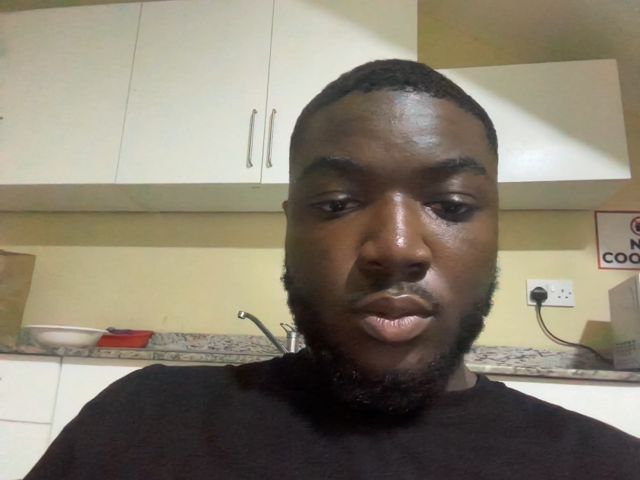

In [18]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))


In [16]:
from google.colab.patches import cv2_imshow

Distance to face 0: [0.22184282]
Distance to face 1: [0.5083615]
Distance to face 2: [0.5283707]
Distance to face 3: [0.62003072]
Distance to face 4: [0.50626544]
Distance to face 5: [0.57177446]
Distance to face 6: [0.53369073]
Distance to face 7: [0.64107664]
Distance to face 8: [0.55546074]
Best match index: 0
Running this
Best match: KELVIN YANNEY
KELVIN YANNEY is already in the attendance sheet.


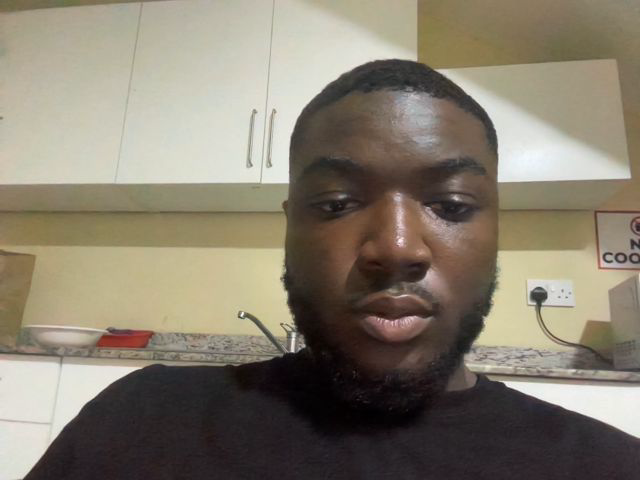

In [19]:
capture = cv2.VideoCapture(filename)
while True:
    success, img = capture.read()
    if img is None or img.size == 0:
        continue

    # Resize the captured frame
    resizedImage = cv2.resize(img, (0, 0), None, 0.25, 0.25)
    resizedImageRGB = cv2.cvtColor(resizedImage, cv2.COLOR_BGR2RGB)  # Convert to RGB

    # Detect face locations in the resized image
    face_locations = face_recognition.face_locations(resizedImageRGB)


    if not encodedImages:
        print("No encoded images to compare.")
        continue

    # Encode the face in the resized image
    faceperframe = face_locations[0]
    encodeperframe = face_recognition.face_encodings(resizedImageRGB, [faceperframe])[0]

    best_match_index = None
    min_distance = float('inf')

    for i, encodeface in enumerate(encodedImages):
        distance = face_recognition.face_distance([encodeface], encodeperframe)
        print(f"Distance to face {i}: {distance}")

        if distance < min_distance:
            min_distance = distance
            best_match_index = i

    print("Best match index:", best_match_index)
    threshold = 0.6  # Adjust the threshold as needed

    if min_distance < threshold:
        name = Names[best_match_index].upper()
        print("Running this")
        print("Best match:", name)
        # Draw rectangles and text on the original image (img)
        # cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        # cv2.putText(img, name, (x1 + 6, y2 - 6), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 255), 2)
        update_attendance(name)

    # Display the full-size frame with rectangles and text
    cv2_imshow(img)

    # Break the loop when 'q' key is pressed
    if (cv2.waitKey(1) or 0xFF == ord('q')):
        break

# Release the capture object
capture.release()

# Close all OpenCV windows
cv2.destroyAllWindows()

In [ ]:
import pickle as pkl

In [ ]:
I_N = {'encodedImages': encodedImages , 'Names': Names}

In [ ]:
with open('Pickle.pkl','wb')as file:
  pickle.dump(I_N,file)